In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
## read csv into dataframe
#put the id dtype to make sure csv is formatted correctly
df = pd.read_csv('../data/train.csv',dtype={'id':int, 'license':str})

In [4]:
price_columns = ['price','weekly_price','monthly_price']
df[price_columns] = df[price_columns].apply(lambda x: x.str.replace(r'[$,]','',regex=True).astype(float))

In [5]:
#look at the name of the colums in the dataset
df.columns


Index(['id', 'last_scraped', 'host_since', 'host_location',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'zipcode', 'market', 'smart_location',
       'latitude', 'longitude', 'is_location_exact', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price',
       'monthly_price', 'security_deposit', 'cleaning_fee', 'guests_included',
       'extra_people', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_upd

In [28]:
df.loc[df['monthly_price'] < 1000]

,id,last_scraped,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,...,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,nh_cum_sum,neighbourhood_grouped,scrape_month
46,4262284,2019-04-16,2013-02-02,"Rio de Janeiro, Rio de Janeiro, Brazil",within a few hours,100%,NaN,f,Leme,3.0,...,f,f,3,3.0,0.0,0.0,0.03,574499,Leme,4
868,1989512,2018-07-14,2013-11-25,"Rio de Janeiro, Rio de Janeiro, Brazil",within a day,83%,NaN,t,Santa Teresa,4.0,...,f,f,4,NaN,NaN,NaN,0.52,491909,Santa Teresa,7
977,199229,2018-11-15,2011-05-19,"Rio de Janeiro, Rio de Janeiro, Brazil",NaN,NaN,NaN,f,Santa Teresa,5.0,...,t,t,5,NaN,NaN,NaN,0.13,713647,other,11
3184,3414825,2018-07-14,2014-06-05,"Rio, Rio de Janeiro, Brazil",NaN,NaN,NaN,f,Vidigal,3.0,...,f,f,3,NaN,NaN,NaN,NaN,652338,other,7
4008,5429243,2019-02-11,2014-03-29,"Rio, Rio de Janeiro, Brazil",within a few hours,100%,NaN,t,Ipanema,6.0,...,f,f,2,1.0,1.0,0.0,0.92,179991,Copacabana,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717982,1740875,2020-05-27,2013-07-27,"Rio de Janeiro, Rio de Janeiro, Brazil",NaN,NaN,47%,f,NaN,2.0,...,f,f,2,0.0,2.0,0.0,0.04,261432,Barra da Tijuca,5
718037,1802374,2019-12-24,2013-10-15,"Centro, Rio de Janeiro, Brazil",within an hour,100%,NaN,t,Centro,13.0,...,f,f,7,2.0,5.0,0.0,0.24,511529,Centro,12
718111,6290833,2019-03-13,2015-05-05,US,a few days or more,0%,NaN,f,NaN,2.0,...,f,f,1,0.0,1.0,0.0,NaN,179991,Copacabana,3
718551,3206766,2019-07-16,2014-05-24,"Rio, Rio de Janeiro, Brazil",within a few hours,100%,NaN,t,Copacabana,1.0,...,f,f,1,0.0,1.0,0.0,3.82,179991,Copacabana,7


**I will look at the columns in these groups:**

- Location Data
- Dates
- Host Data
- Property Info
- Review Scores
- Other

## Location Data

In [6]:
df[['street', 'neighbourhood', 'neighbourhood_cleansed',
    'neighbourhood_group_cleansed', 'zipcode','market',
    'smart_location','latitude', 'longitude', 
    'is_location_exact']].head(5)

,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,zipcode,market,smart_location,latitude,longitude,is_location_exact
0,"Rio de Janeiro, RJ, Brazil",Centro,Centro,NaN,20231-092,Rio De Janeiro,"Rio de Janeiro, Brazil",-22.914490,-43.188010,t
1,"Copacabana, Rio de Janeiro, Rio de Janeiro, Br...",Copacabana,Copacabana,NaN,22030,Rio De Janeiro,"Copacabana, Rio de Janeiro, Brazil",-22.964951,-43.184627,t
2,"Rio de Janeiro, Rio de Janeiro, Brazil",Leme,Leme,NaN,22010-060,Rio De Janeiro,"Rio de Janeiro, Brazil",-22.960568,-43.171205,f
3,"Rio de Janeiro, Rio de Janeiro, Brazil",Botafogo,Botafogo,NaN,22290080,Rio De Janeiro,"Rio de Janeiro, Brazil",-22.955190,-43.177640,t
4,"Rio de Janeiro, Rio de Janeiro, Brazil",Botafogo,Botafogo,NaN,22260,Rio De Janeiro,"Rio de Janeiro, Brazil",-22.949137,-43.189833,t


- neighbourhood_cleansed seems the most appropriate to use. could also use lat/long 

### neighbourhood_cleansed

In [10]:
df['neighbourhood_cleansed'].describe()
#159 unique values -- too high!

count         721768
unique           159
top       Copacabana
freq          179991
Name: neighbourhood_cleansed, dtype: object

In [7]:
#if we were to take a threshhold of 80,
cum_sum = df['neighbourhood_cleansed'].value_counts() \
                                      .cumsum() \
                                      .reset_index() \
                                      .rename(columns={"neighbourhood_cleansed": "nh_cum_sum",
                                                       "index":"neighbourhood_cleansed"})

df = df.merge(cum_sum, on = 'neighbourhood_cleansed',how='left')

df.loc[(df['nh_cum_sum'] / df.shape[0]) <= 0.8]['neighbourhood_cleansed'].value_counts()

Copacabana                  179991
Barra da Tijuca              81441
Ipanema                      60644
Jacarepaguá                  41594
Recreio dos Bandeirantes     36217
Botafogo                     35243
Leblon                       32929
Santa Teresa                 23850
Centro                       19620
Flamengo                     19035
Tijuca                       15982
Laranjeiras                  15294
Leme                         12659
Name: neighbourhood_cleansed, dtype: int64

In [8]:
df['neighbourhood_grouped'] = df.apply(
    lambda x: x['neighbourhood_cleansed'] if x['nh_cum_sum'] / df.shape[0] <= 0.8 else 'other',axis=1)

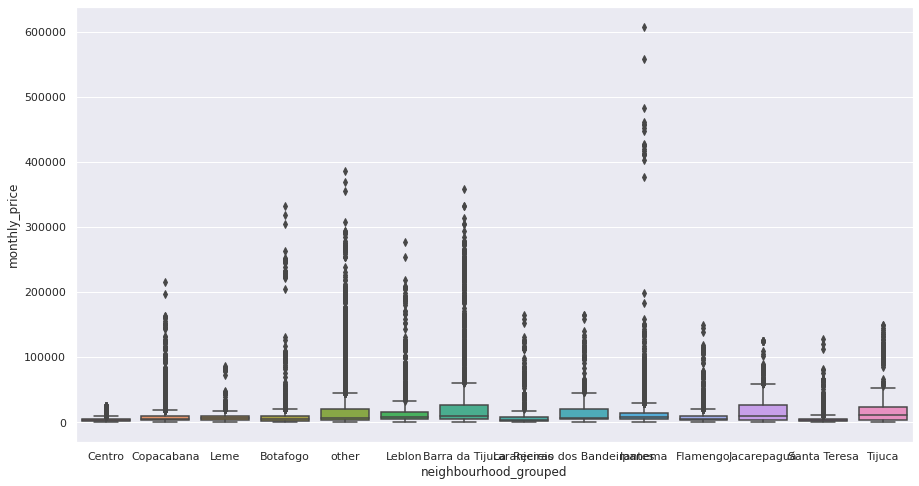

In [13]:
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.boxplot(x = 'neighbourhood_grouped', y = 'monthly_price',data = df)

[(0.0, 65000.0)]

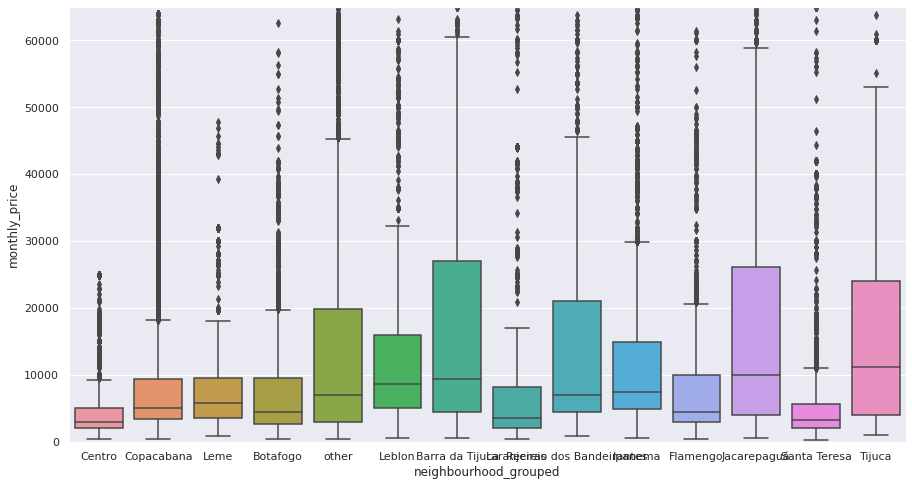

In [15]:
#closer look at the boxplots
ax = sns.boxplot(x = 'neighbourhood_grouped', y = 'monthly_price',data = df)
ax.set(ylim=(0, 65000))

In [16]:
# does street column contain different info to neighbourhood?
df.loc[~(df['street'].str.split(',',n=1,expand=True)[0] == df['neighbourhood_cleansed'])
       ][['street','neighbourhood_cleansed']].drop_duplicates()
# yes

,street,neighbourhood_cleansed
0,"Rio de Janeiro, RJ, Brazil",Centro
2,"Rio de Janeiro, Rio de Janeiro, Brazil",Leme
3,"Rio de Janeiro, Rio de Janeiro, Brazil",Botafogo
5,"Rio de Janeiro, Rio de Janeiro, Brazil",Copacabana
6,"Rio, Rio de Janeiro, Brazil",Quintino Bocaiúva
...,...,...
694371,"Bonsucesso, Rio de Janeiro, Brazil",Glória
696833,"Copacabana- RJ, Rio de Janeiro, Brazil",Copacabana
702815,"Rio de janeiro, RJ, Brazil",Curicica
714138,"Río de Janeiro, RJ, Brazil",Flamengo


In [17]:
df['street'].str.lower().str.strip().str.split(',', expand=True)[0].describe()
#but over half the streets are just the name of the city.

count             721768
unique               438
top       rio de janeiro
freq              441841
Name: 0, dtype: object

In [18]:
df['street'].str.lower().str.strip().str.split(',', expand=True)[0].value_counts().head(10)
#top 10 either just say some form of rdj, or just say the neighbourhood which we alreay have in neighbourhood_cleansed

rio de janeiro              441841
copacabana                   67688
rio                          47581
barra da tijuca              22673
ipanema                      17237
recreio dos bandeirantes     10738
botafogo                     10589
leblon                        9640
centro                        7916
rio de janeiro                7148
Name: 0, dtype: int64

In [19]:
df[['calendar_updated','last_scraped']]
# use last_scraped for date

,calendar_updated,last_scraped
0,9 months ago,2020-05-25
1,48 months ago,2018-07-14
2,12 months ago,2018-11-15
3,3 months ago,2019-03-13
4,32 months ago,2018-07-14
...,...,...
721763,28 months ago,2019-01-18
721764,7 months ago,2018-11-15
721765,24 months ago,2018-07-14
721766,36 months ago,2020-03-19


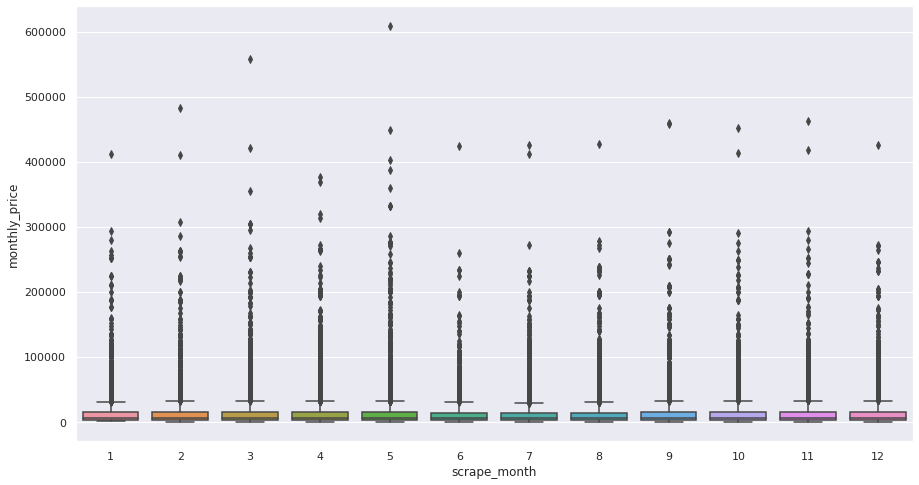

In [33]:
df['scrape_month'] = pd.to_datetime(df['last_scraped'], format='%Y-%m-%d').dt.month
ax = sns.boxplot(x = 'scrape_month', y = 'monthly_price',data = df,whis=1.5)

[(0.0, 35000.0)]

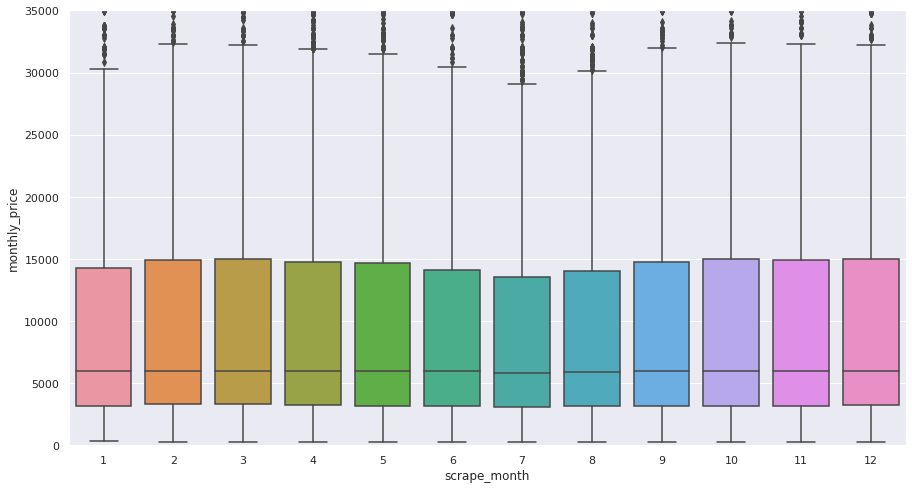

In [37]:
df['scrape_month'] = pd.to_datetime(df['last_scraped'], format='%Y-%m-%d').dt.month
ax = sns.boxplot(x = 'scrape_month', y = 'monthly_price',data = df,whis=1.5)
ax.set(ylim=(0, 35000))
# this looks to reflect the seasons in brasil. although i'm surprised the price differences arent bigger

In [38]:
#host columns
df[['host_since', 'host_location', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified']].head(5)


,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified
0,2018-02-21,United States,within a day,100%,NaN,f,NaN,1.0,1.0,"['email', 'phone', 'jumio', 'offline_governmen...",t,f
1,2014-05-06,BR,NaN,NaN,NaN,f,Copacabana,1.0,1.0,"['email', 'phone']",t,f
2,2014-12-02,"Rio de Janeiro, State of Rio de Janeiro, Brazil",within a day,75%,NaN,f,NaN,5.0,5.0,"['email', 'phone', 'facebook', 'reviews']",t,f
3,2014-12-03,"Rio de Janeiro, State of Rio de Janeiro, Brazil",within an hour,100%,NaN,f,Botafogo,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t
4,2014-12-11,"Rio de Janeiro, State of Rio de Janeiro, Brazil",NaN,NaN,NaN,f,Botafogo,2.0,2.0,"['email', 'phone', 'reviews']",t,f


In [42]:
#check nulls
df[['host_since', 'host_location', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified']].isna().sum().apply(lambda x: x / df.shape[0])
#anything with >30% nulls not happy to use



host_since                   0.000496
host_location                0.005446
host_response_time           0.445460
host_response_rate           0.445464
host_acceptance_rate         0.895102
host_is_superhost            0.000000
host_neighbourhood           0.384284
host_listings_count          0.000496
host_total_listings_count    0.000496
host_verifications           0.000000
host_has_profile_pic         0.000000
host_identity_verified       0.000000
dtype: float64

In [39]:
#convert to true/false
columns = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified']
df[columns] = df[columns].applymap(lambda x: 1 if x == 't' else 0)
df[columns]

,host_is_superhost,host_has_profile_pic,host_identity_verified
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,1
4,0,1,0
...,...,...,...
721763,0,1,1
721764,0,1,0
721765,0,1,0
721766,0,1,0


<AxesSubplot:>

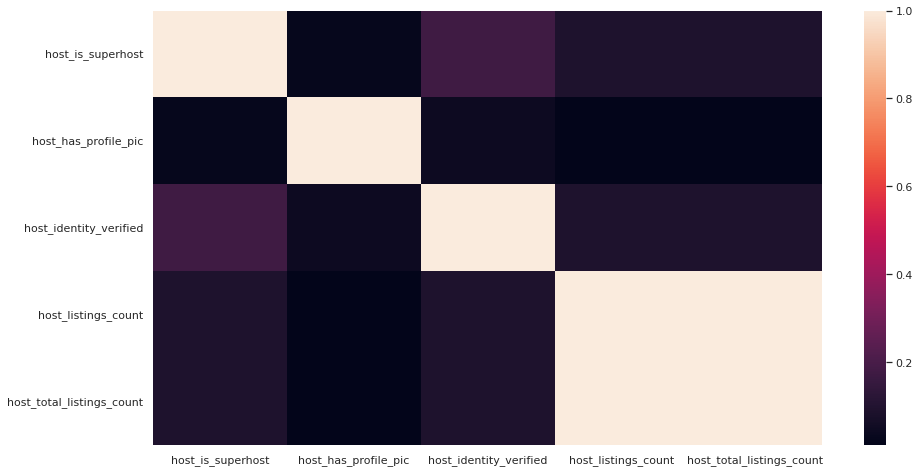

In [40]:
sns.heatmap(df[columns + ['host_listings_count',
       'host_total_listings_count']].corr())
# listings_count and total_listing count are identical
#for the others no notable correlation


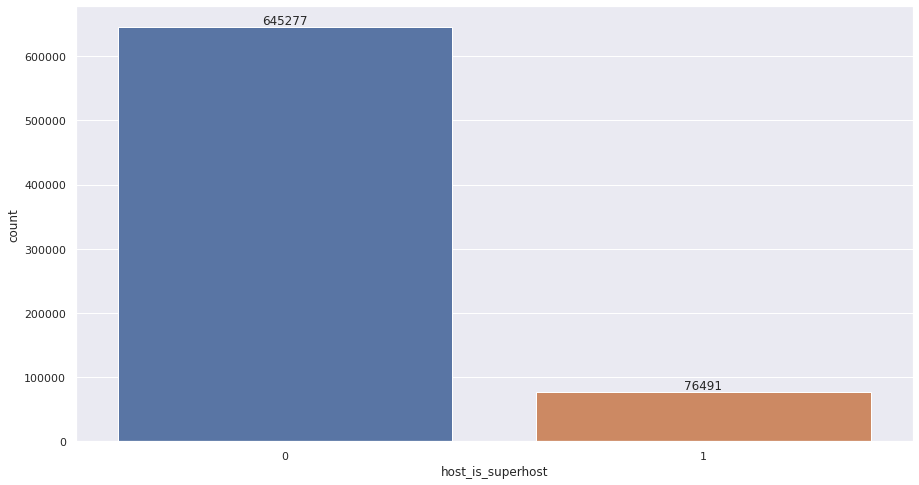

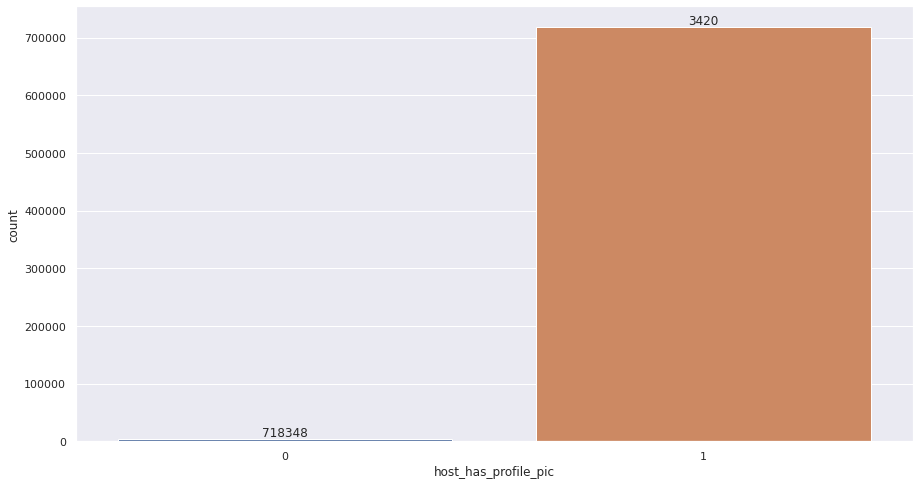

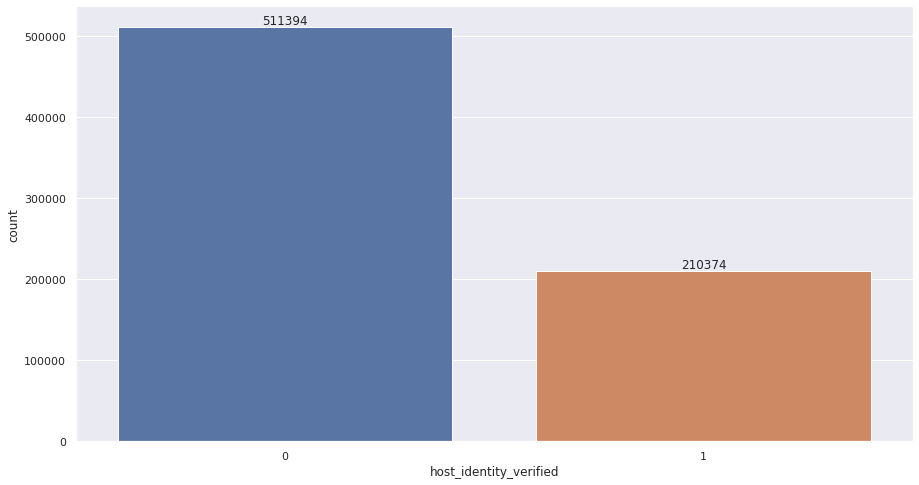

In [43]:

for column in ['host_is_superhost','host_has_profile_pic', 'host_identity_verified' ]:
    ax = sns.countplot(x=column,data=df)
    
    abs_values = df[column].value_counts(ascending=False).values

    ax.bar_label(container=ax.containers[0], labels=abs_values)
    plt.show()
    
#observations
# host_has_profile_pic near zero variance. remove?

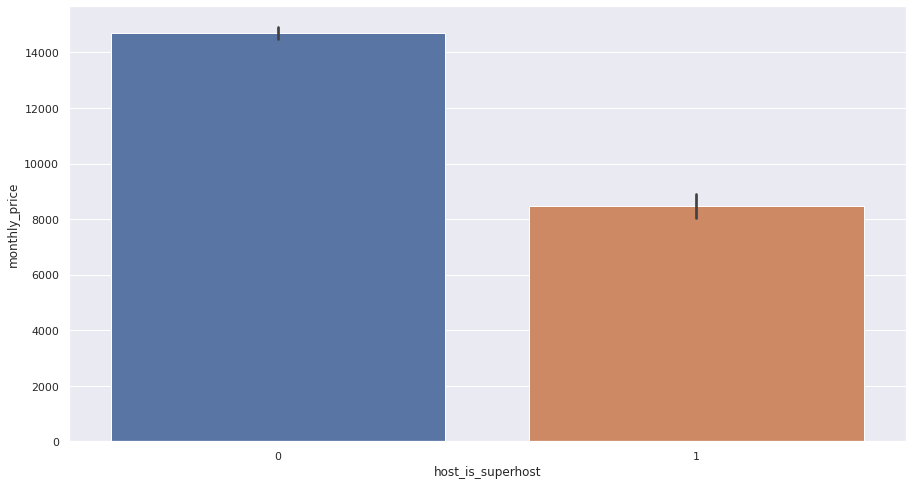

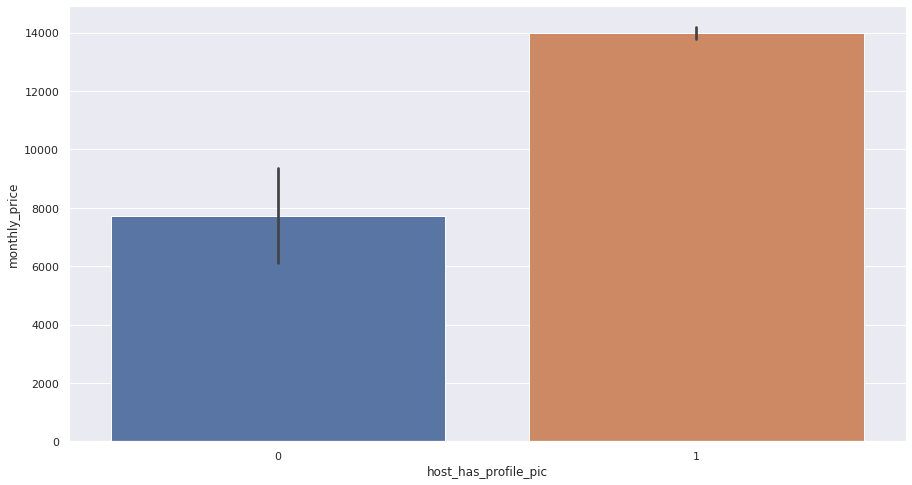

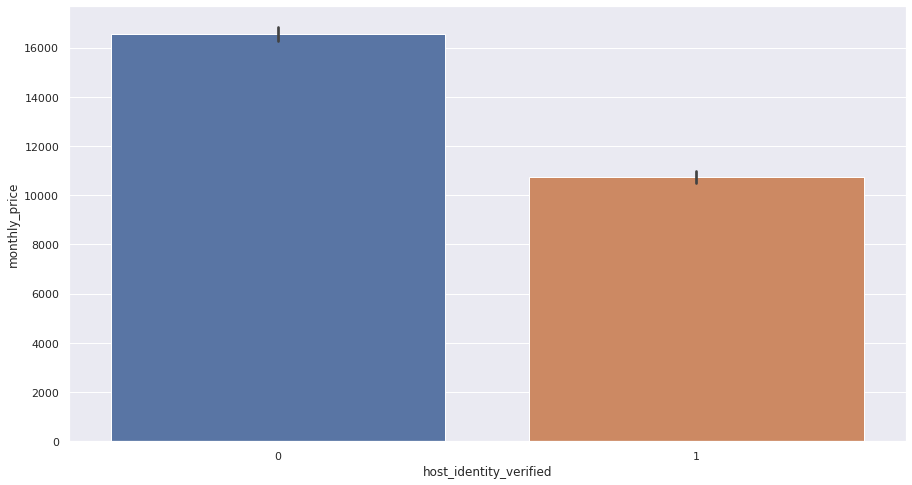

In [44]:
for column in ['host_is_superhost','host_has_profile_pic', 'host_identity_verified' ]:
    sns.barplot(x=column,y='monthly_price',data=df)
    plt.show()
#hosts who are identified sell for on average less han hosts who arent verified 

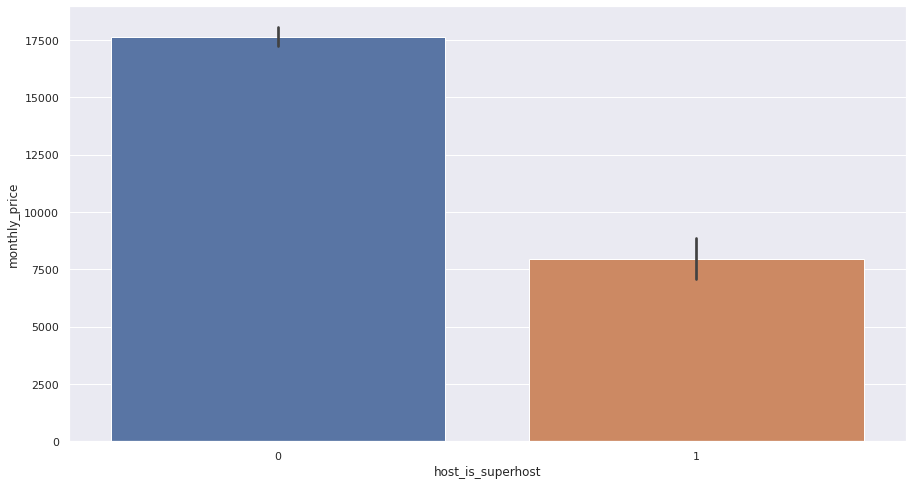

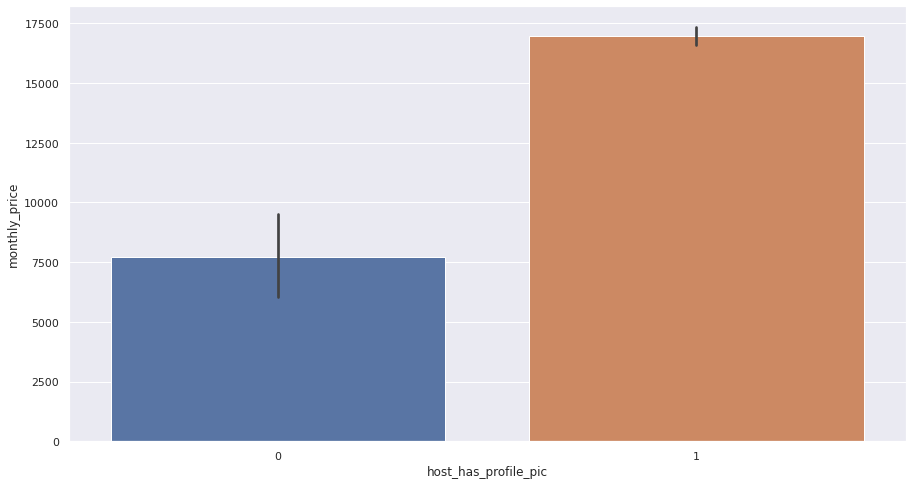

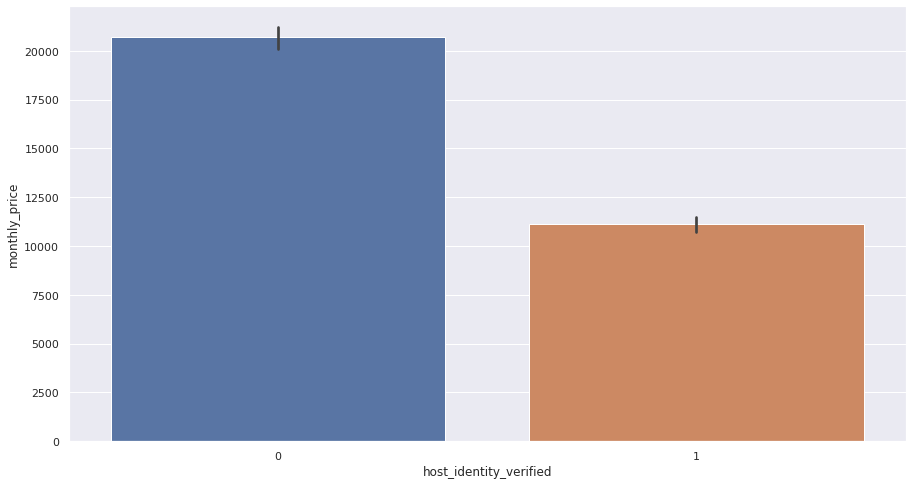

In [45]:
#looking at only airbnbs that are fully booked
for column in ['host_is_superhost','host_has_profile_pic', 'host_identity_verified' ]:
    sns.barplot(x=column,y='monthly_price',data=df.loc[df['availability_30'] == 0])
    plt.show()
#no difference ?

In [48]:
columns = ['property_type','room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'amenities', 'square_feet', 'security_deposit', 'cleaning_fee', 'guests_included',
       'extra_people', 'minimum_nights', 'maximum_nights']

In [50]:
df[columns].isna().sum().apply(lambda x: x / df.shape[0])
# wouldnt like to use anything with > 30% missing data

property_type       0.000000
room_type           0.000000
accommodates        0.000000
bathrooms           0.001919
bedrooms            0.000912
beds                0.002775
bed_type            0.000000
amenities           0.000000
square_feet         0.984440
price               0.000000
weekly_price        0.915970
monthly_price       0.907617
security_deposit    0.467431
cleaning_fee        0.347678
guests_included     0.000000
extra_people        0.000000
minimum_nights      0.000000
maximum_nights      0.000000
dtype: float64

In [53]:
df[['accommodates', 'bathrooms', 'bedrooms', 'beds', 'minimum_nights', 'maximum_nights']].describe()

,accommodates,bathrooms,bedrooms,beds
count,721768.000000,720383.000000,721110.000000,719765.000000
mean,4.204598,1.694075,1.643835,2.599150
std,2.605562,1.164869,1.078333,2.065564
min,1.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,2.000000
75%,6.000000,2.000000,2.000000,3.000000
max,160.000000,200.000000,45.000000,86.000000


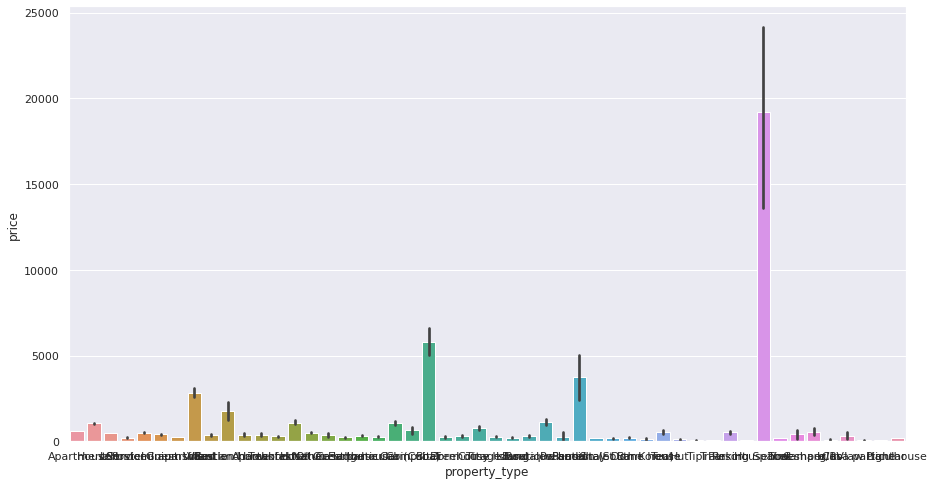

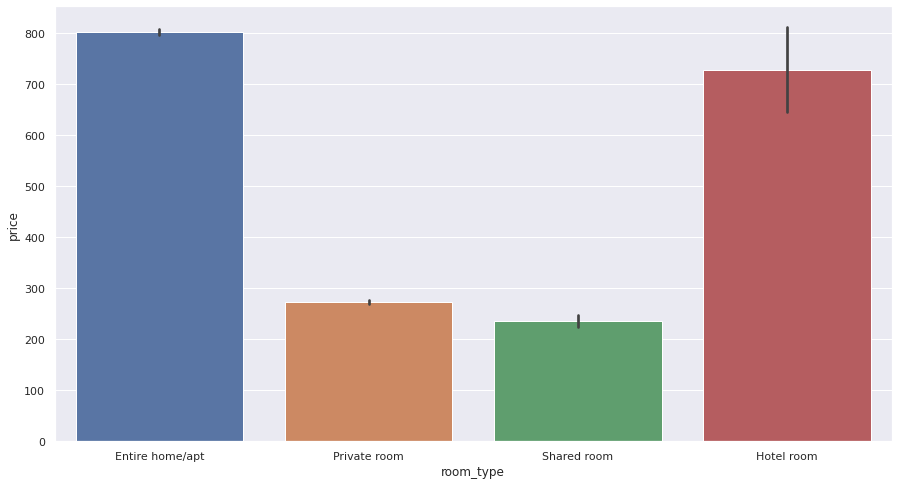

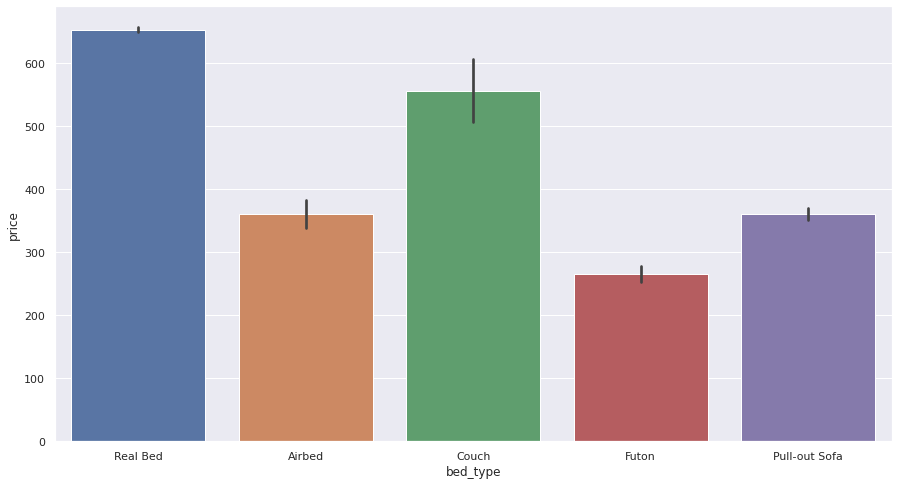

In [55]:
for column in ['property_type','room_type', 'bed_type']:
    sns.barplot(x=column,y='price',data=df)
    plt.show()

In [56]:
#closer look at property type
df['property_type'].value_counts()

Apartment                 558489
House                      74279
Condominium                31323
Serviced apartment         15632
Loft                       13097
Bed and breakfast           5143
Hostel                      4058
Guest suite                 3813
Other                       2596
Guesthouse                  2578
Villa                       2245
Townhouse                   1251
Hotel                       1143
Aparthotel                  1108
Boutique hotel               716
Earth house                  596
Cottage                      508
Chalet                       499
Tiny house                   472
Boat                         434
Casa particular (Cuba)       336
Cabin                        225
Bungalow                     217
Dorm                         191
Nature lodge                 177
Castle                       124
Treehouse                     57
Farm stay                     56
Island                        49
Tent                          44
Campsite  

In [57]:
#lets take a threshold of 90%
#if we were to take a threshhold of 80,
cum_sum = df['property_type'].value_counts() \
                                      .cumsum() \
                                      .reset_index() \
                                      .rename(columns={"property_type": "pt_cum_sum",
                                                       "index":"property_type"})

df = df.merge(cum_sum, on = 'property_type',how='left')

df.loc[(df['pt_cum_sum'] / df.shape[0]) <= 0.9]['property_type'].value_counts()

Apartment    558489
House         74279
Name: property_type, dtype: int64

[(0.0, 35000.0)]

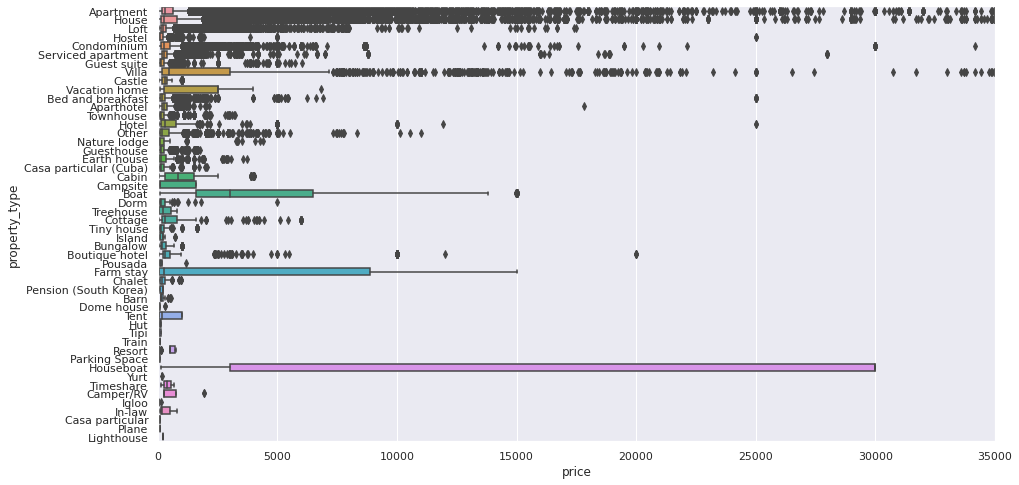

In [61]:
ax = sns.boxplot(x='price',y='property_type',data=df)
ax.set(xlim=(0, 35000))